<img src= Titanicin-Batisi.jpg />

# Titanic - Machine Learning from Disaster

This is the famous __Titanic ML Competition dataset__ from Kaggle.com. In this dataset our goal is to __predict whether the person will survive or not__ according to certain parameters.
In this notebook, we will __examine how well do different machine learning algorithms perform.__

## Overview

The data has been split into two groups:

__training set (train.csv)     
test set (test.csv)__

The training set should be used to build the machine learning models. For the training set, outcome is provided (also known as the “ground truth”) for each passenger. The model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features. I will not.

The test set should be used to see how well the models perform on unseen data. For the test set, outcomes are not provided. For each passenger in the test set, use the trained model to predict whether or not they survived the sinking of the Titanic.

'gender_submission.csv' is also included, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Variable Notes
__Pclass:__ A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

__Age:__ Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

__SibSp:__ The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

__Parch:__ The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Importing Initial Libraries

We will later import the necessary sklearn libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading The Data

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Get rid of unnecessary columns
The columns; __PassengerId, Name, Ticket, Cabin, Embarked are irrelevant__ to our training model and are unnecessary. Let's remove them.

In [6]:
train_df = train_df.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)

In [7]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## Data Visualisation

<Axes: xlabel='Survived', ylabel='count'>

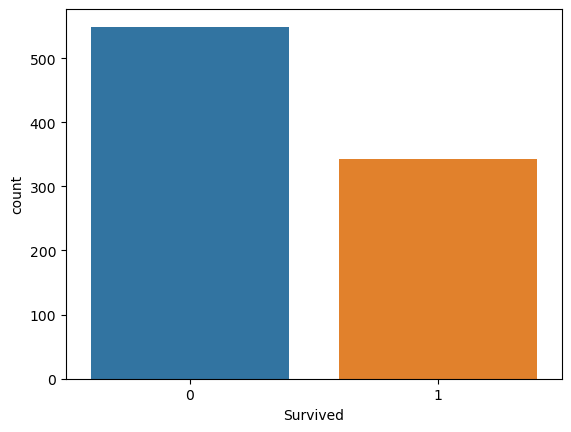

In [24]:
sns.countplot(data=train_df, x='Survived')

<Axes: xlabel='Sex', ylabel='count'>

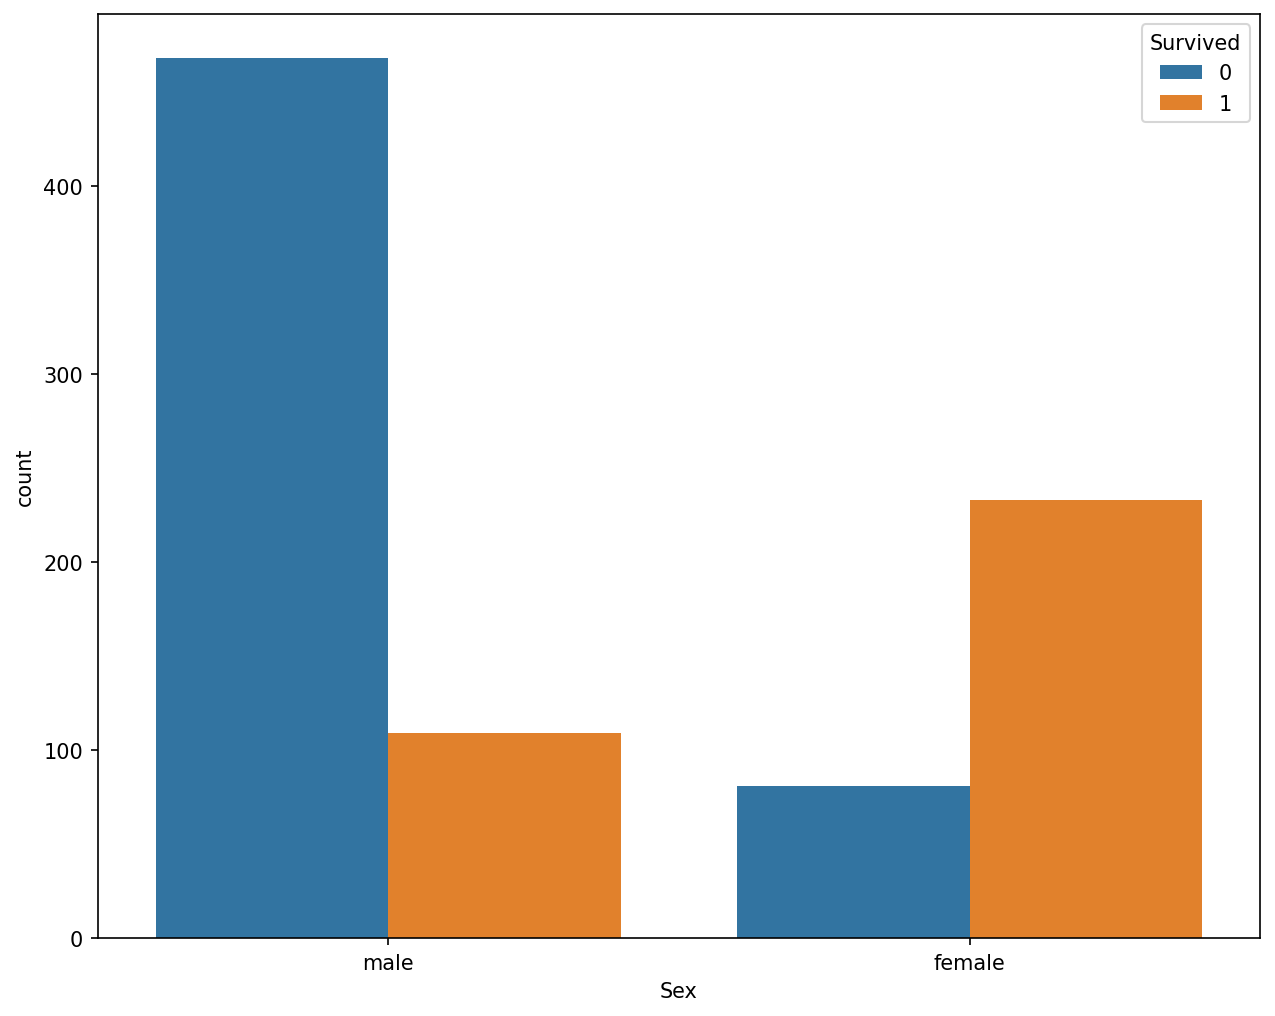

In [23]:
plt.figure(figsize=(10,8), dpi=150)
sns.countplot(data=train_df, x='Sex', hue='Survived')

<Axes: xlabel='Age', ylabel='Fare'>

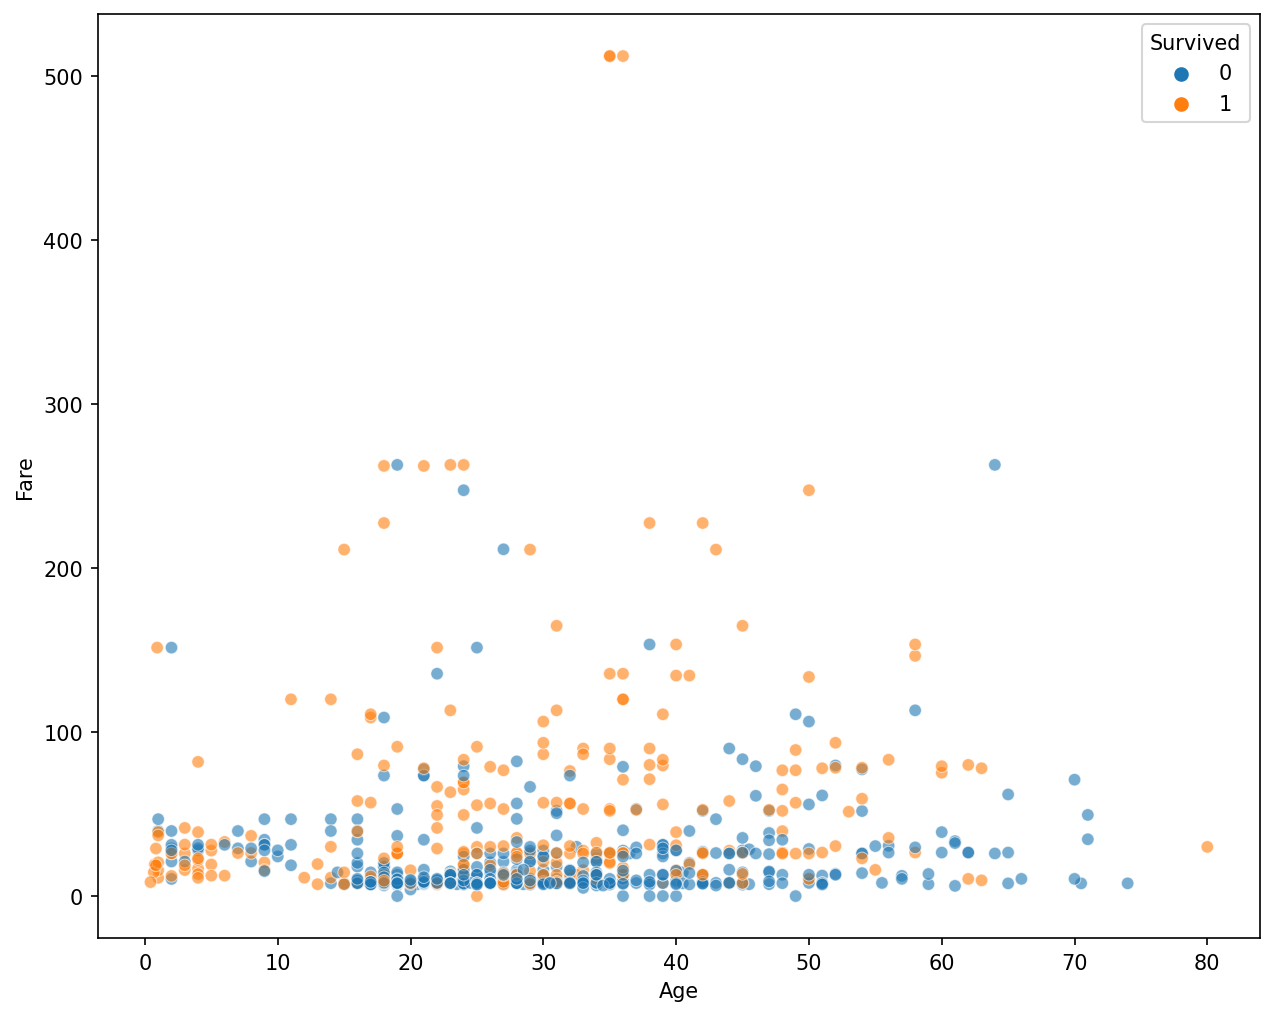

In [14]:
plt.figure(figsize=(10,8), dpi=150)
sns.scatterplot(data=train_df, y='Fare', x='Age', hue='Survived', alpha=0.6)

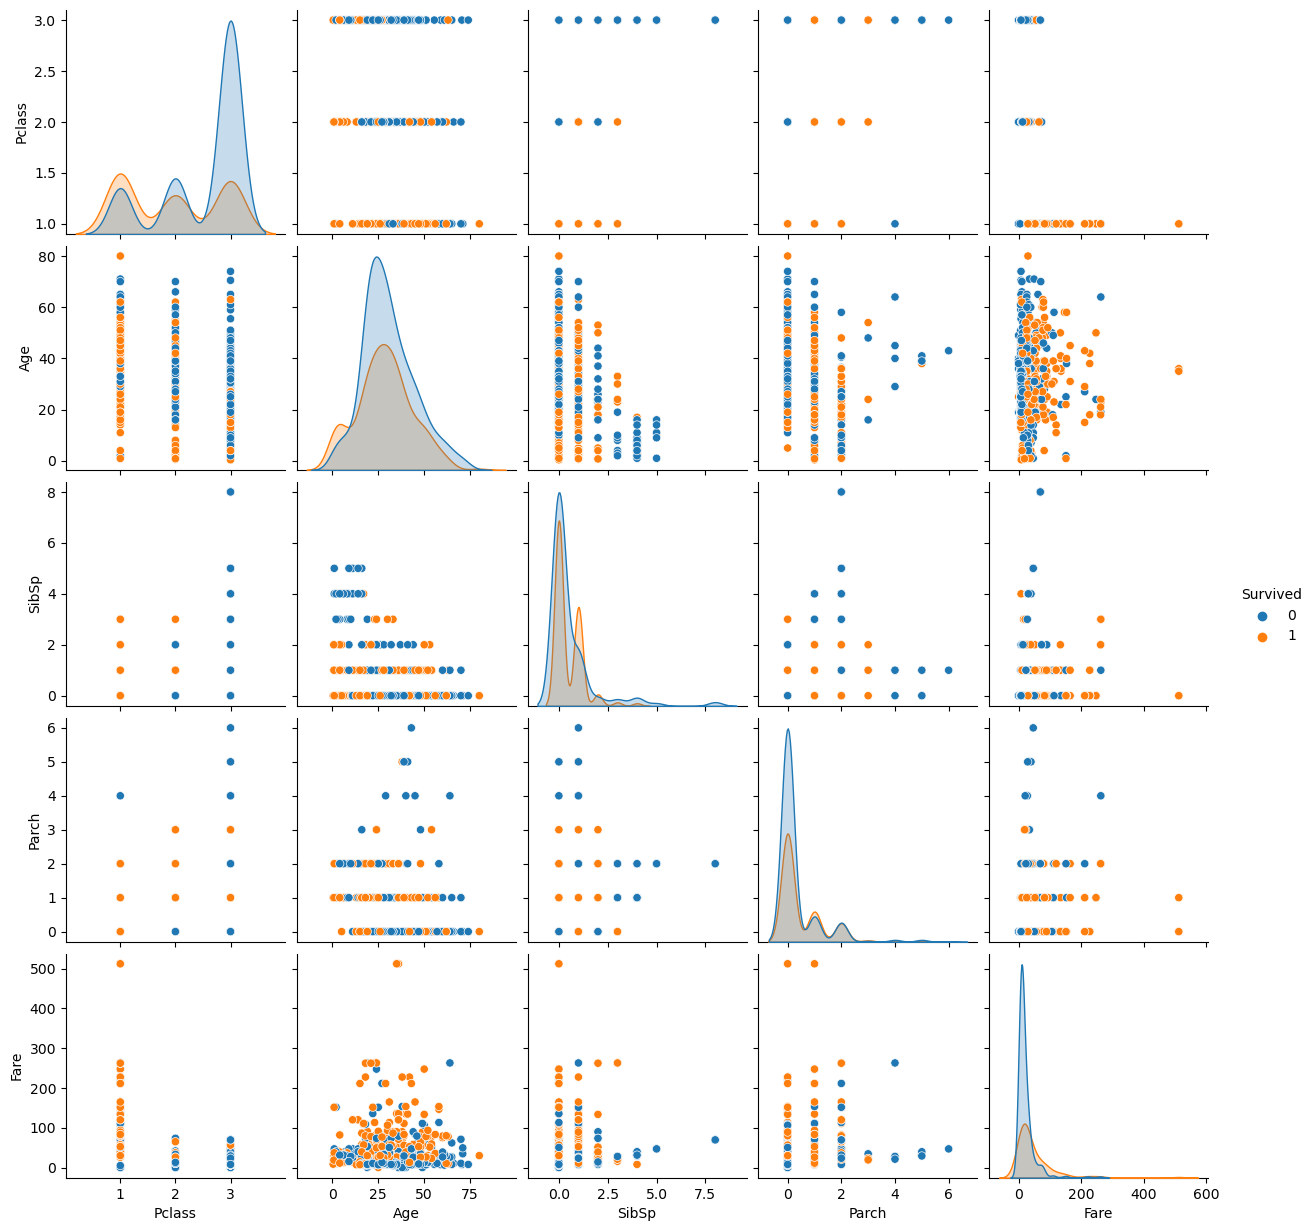

In [15]:
sns.pairplot(data=train_df, hue='Survived')

## Feature Selection and Model Training

__'Age'__ and __'Fare'__ don't seem to be much of a selective feature for our model, I will not include them to our training dataframe.

Then we will import relevant Sci-kit Learn libraries and train our model.

In [19]:
X = pd.get_dummies(train_df.drop(['Survived','Age','Fare'],axis=1))
y = train_df['Survived']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [40]:
LR_model = LogisticRegression()
KNN_model = KNeighborsClassifier()
SVC_model = SVC()
DTC_model = DecisionTreeClassifier()
GBC_model = GradientBoostingClassifier()
ABC_model = AdaBoostClassifier()

models = [LR_model, KNN_model, SVC_model, DTC_model, GBC_model, ABC_model]

In [41]:
scores = []
for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)
    print(f'Model: {str(model)} \t Score = {score}')

Model: LogisticRegression() 	 Score = 0.7985074626865671
Model: KNeighborsClassifier() 	 Score = 0.7238805970149254
Model: SVC() 	 Score = 0.7985074626865671
Model: DecisionTreeClassifier() 	 Score = 0.7910447761194029
Model: GradientBoostingClassifier() 	 Score = 0.7686567164179104
Model: AdaBoostClassifier() 	 Score = 0.7910447761194029


In [47]:
models_df = pd.DataFrame(data=scores,
                         columns=['Scores'],
                         index=['LogisticRegression','KNearestNeighbors','SupporVectorClassifier','DecisionTreeClassifier','GradientBoosClassifier','AdaBoostClassifier'])
models_df

,Scores
LogisticRegression,0.798507
KNearestNeighbors,0.723881
SupporVectorClassifier,0.798507
DecisionTreeClassifier,0.791045
GradientBoosClassifier,0.768657
AdaBoostClassifier,0.791045


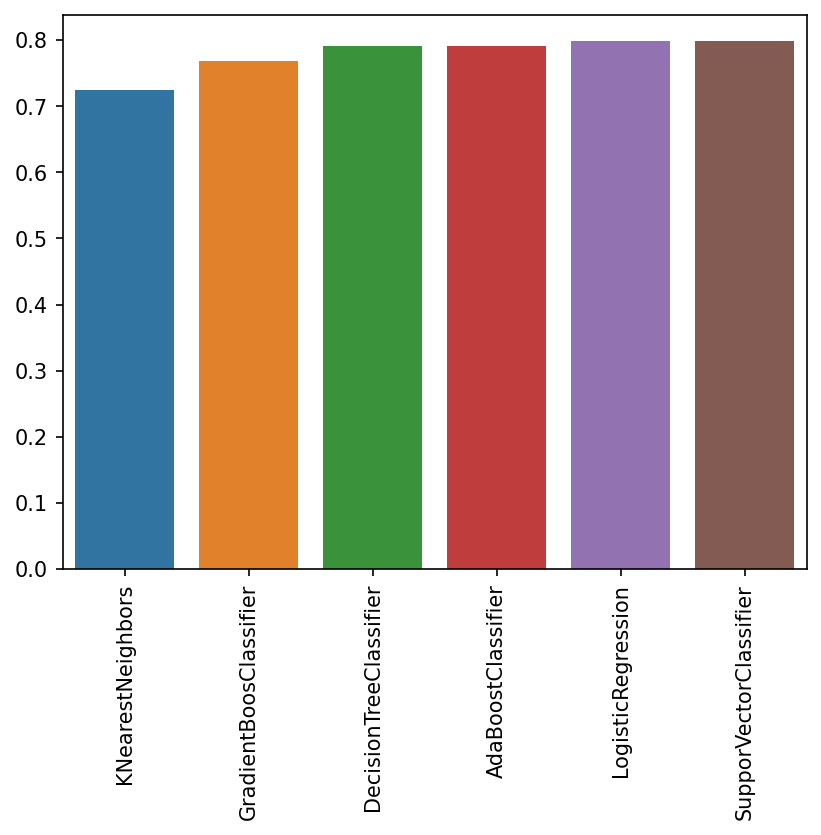

In [57]:
plt.figure(dpi=150)
sns.barplot(data=models_df.sort_values(by='Scores').transpose())
plt.xticks(rotation=90);

## Predicting Real Test Values and Submission

In [67]:
test_df = pd.read_csv("test (1).csv")

In [68]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
test_features = pd.get_dummies(test_df[['Pclass','Sex','SibSp','Parch']])

In [70]:
test_features.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,0,0,0,1
1,3,1,0,1,0
2,2,0,0,0,1
3,3,0,0,0,1
4,3,1,1,1,0


In [71]:
## I will use Support Vector Classifier because as seen in the plot abone it has the best score. ##

preds = SVC_model.predict(test_features)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': preds})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [72]:
submission = pd.read_csv('submission.csv')

In [73]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Our submissions are ready!